### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

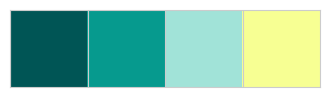

In [2]:
color = ['#005555', '#069A8E', '#A1E3D8', '#F7FF93']
sns.set_palette(color)
sns.palplot(sns.color_palette())

## Задание 1: Поиск переменных из случайного шума

Используя dataset_0.csv, необходимо найти и идентифицировать переменные, которые являются случайным шумом и не имеют значимой корреляции или влияния на другие переменные в датасете.

### Загрузим данные из файла

In [3]:
df0 = pd.read_csv('./../datasets/dataset_0.csv')
df0.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -2.899907   0.416956  -2.537387          1   0.525815  -2.830056   
1  -0.503141   0.283345   0.325574          1   0.317668   0.599717   
2  -6.560124  -1.334441   0.562320          0   0.087322  -4.781831   
3 -10.912819   0.308334  -3.496197          0   0.082024 -12.598419   
4  -4.609628  -2.721853   1.713445          0   0.370517   6.739384   

   feature_6  feature_7  feature_8  feature_9  ...  feature_12  feature_13  \
0  -2.770089  -0.522188  -0.016822   3.997906  ...   -2.772272    0.335127   
1  -0.270953   1.359805   1.725321   2.288644  ...   -0.838587    0.888538   
2  -0.238253  -0.821628  -2.615665   2.330243  ...   -1.525412   -0.696060   
3  -0.247768  -1.128131  -5.131549   2.679787  ...   -4.801637    1.103051   
4  -1.282858   3.624201   3.042493   4.732795  ...   -2.447469    1.322181   

   feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  \
0   -4.289254   -2.312227   -1.140747   -0.364969    1.951992    3.202033   
1   -1.692029   -3.043541    0.666780   -0.740434   -3.157307   -0.414575   
2   -1.470102   -2.303350   -2.282194   -0.856081    1.759247    2.032912   
3   -6.771097   -4.397974   -7.358083    1.276255    1.358367    4.895844   
4   -6.079337    1.234235    2.581851   -0.079946    3.019740    2.101344   

   feature_20  class  
0           0      1  
1           0      1  
2           1      1  
3           0      1  
4           0      1  

[5 rows x 22 columns]

In [4]:
print(df0.columns, '\n', f' Размерность данных: {df0.shape[0]} строк и {df0.shape[1]} столбцов')

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'class'],
      dtype='object') 
  Размерность данных: 1014 строк и 22 столбцов


### Выведем список колонок с низкой корелляцией и дисперсией.

In [5]:
def low_correlation_features(data, threshold):
    corr_matrix = data.corr()
    target_corr = abs(corr_matrix['class'])
    low_corr_columns = [column for column in target_corr.index if target_corr[column] < threshold]
    return low_corr_columns

threshold = 0.3

print("Колонки с низкой корреляцией:", low_correlation_features(df0, threshold))

Колонки с низкой корреляцией: ['feature_1', 'feature_3', 'feature_4', 'feature_13', 'feature_17', 'feature_20']


In [6]:
# Вычисление дисперсии для каждого признака, кроме 'class'
feature_columns = [col for col in df0.columns if col != 'class']
variances = df0[feature_columns].var()

# Определение признаков с дисперсией меньше 2
low_variance_features = variances[variances < 2].index

# Вывод отфильтрованных признаков с дисперсией меньше 2
print("Признаки с низкой дисперсией меньше 2:\n", low_variance_features)

Признаки с низкой дисперсией меньше 2:
 Index(['feature_1', 'feature_3', 'feature_4', 'feature_13', 'feature_17',
       'feature_20'],
      dtype='object')


### Визуализируем признаки с высокой корелляцией

Можно сделать предположение, что признаки с низкой корреляцией и низкой дисперсией могут не содержать существенной информации для модели. Если определенный признак имеет очень маленькую дисперсию, то это может означать, что большинство его значений очень близки к среднему значению. Это может значить, что признак не вносит существенный вклад в различие между объектами.

In [7]:
df_clear = df0.drop(columns=['feature_1', 'feature_3', 'feature_4', 'feature_13', 'feature_17',
       'feature_20'])
df_clear.columns

Index(['feature_0', 'feature_2', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_14', 'feature_15', 'feature_16', 'feature_18', 'feature_19',
       'class'],
      dtype='object')

### Выведем попарную диаграмму и тепловую карту для визуализации результата.

In [8]:
corr = df_clear.corr()

#### Попарная диаграмма

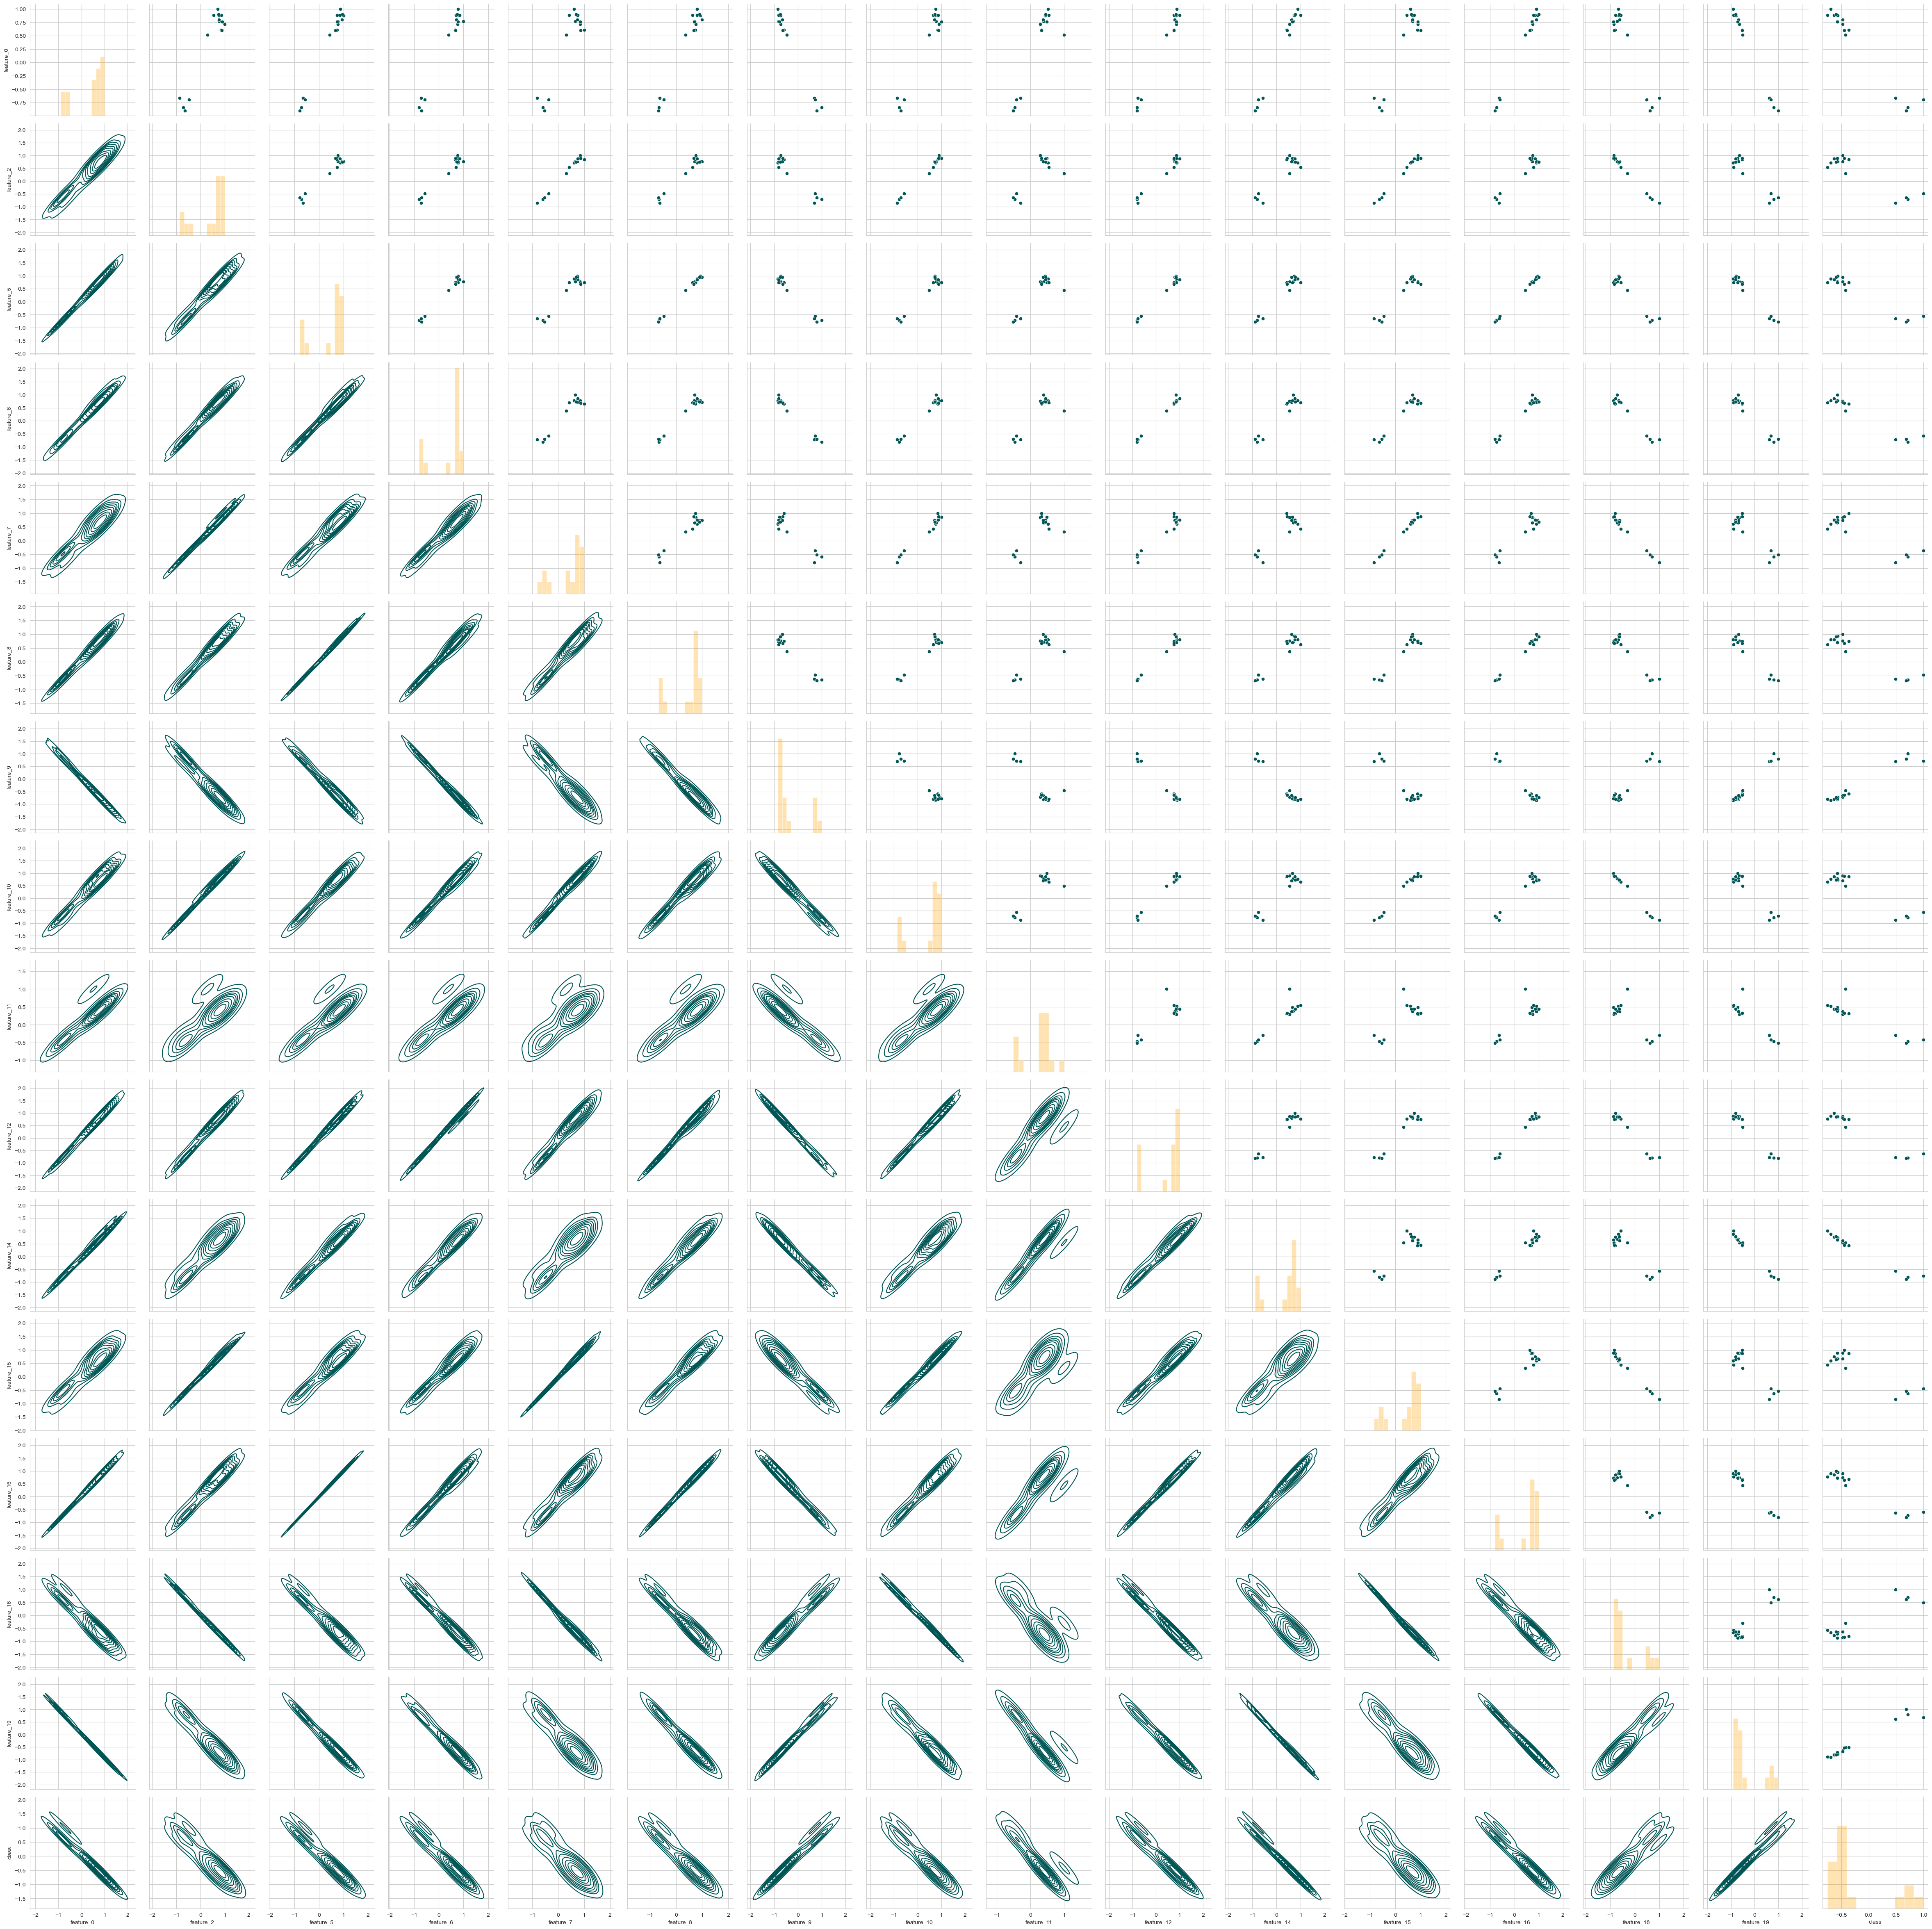

In [9]:
pairplt = sns.PairGrid(corr, height=3)
pairplt.map_upper(sns.scatterplot)
pairplt.map_diag(plt.hist, alpha=0.3, color='orange')
pairplt.map_lower(sns.kdeplot);

#### Тепловая карта

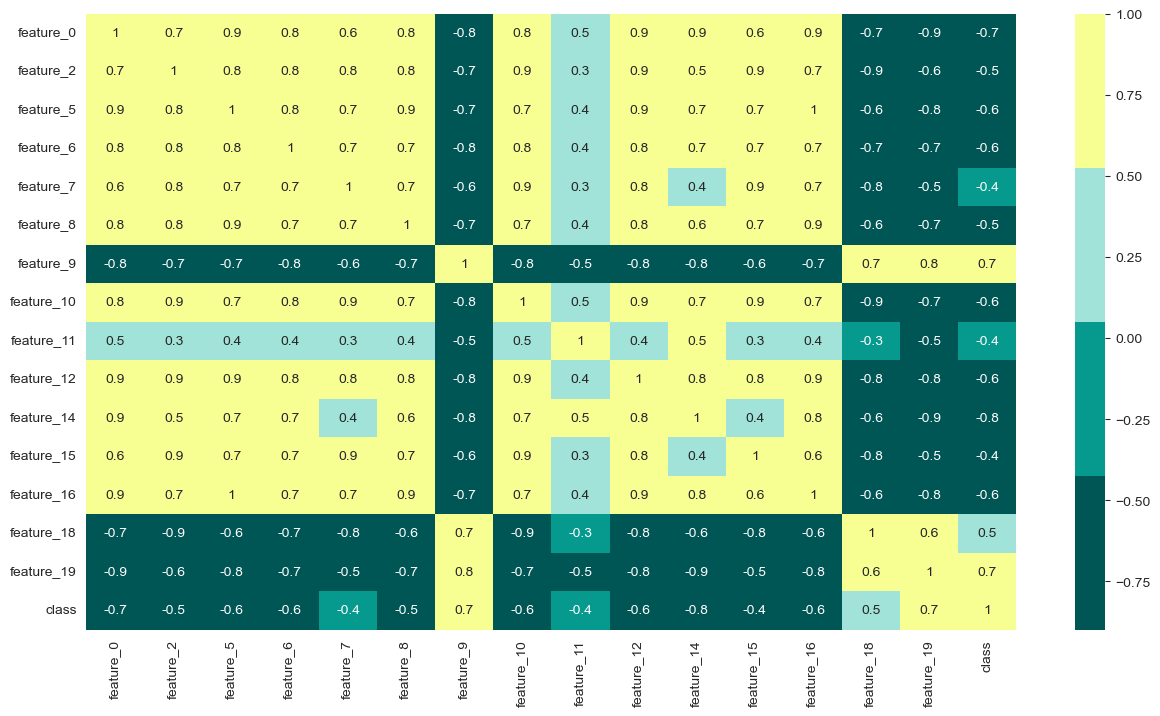

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=color);

## Задание 2: Анализ зависимостей с использованием pandas и библиотек для построения графиков

Используйте dataset_1.csv

Опишите зависимость между переменными и таргетом без использования моделей, только с помощью pandas и библиотек для визуализации данных.

In [11]:
df1 = pd.read_csv('./../datasets/dataset_1.csv')
df1.head()

feature_1  feature_2  target
0  -0.532193   0.814028       0
1  -0.212750   1.011712       0
2   0.306720   0.959148       0
3   0.786851  -0.031955       1
4  -0.239004  -0.757634       1

In [12]:
df1.columns

Index(['feature_1', 'feature_2', 'target'], dtype='object')

### Построим графики и посмотрим, есть ли зависимости между признаками 'feature_1', 'feature_2' и целевой переменной 'target'

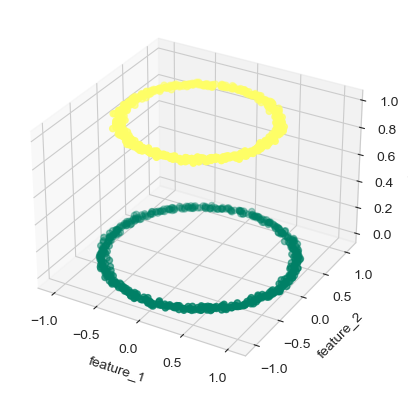

In [13]:
X = df1['feature_1']
Y = df1['feature_2']
Z = df1['target']

colors = plt.cm.summer((Z - Z.min()) / (Z.max() - Z.min()))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, marker='o', c=colors)

# Настройки осей
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('target')
# ax.grid(False)

plt.show()

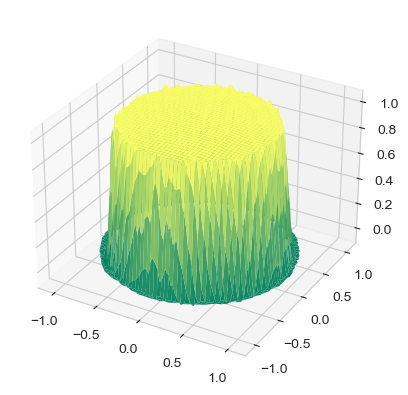

In [14]:
from scipy.interpolate import griddata
import numpy as np

num_points = 100
x_range = np.linspace(df1['feature_1'].min(), df1['feature_1'].max(), num_points)
y_range = np.linspace(df1['feature_2'].min(), df1['feature_2'].max(), num_points)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Интерполируйте Z на основе полученной сетки (x_grid, y_grid)
xy_tuples = np.vstack((df1['feature_1'], df1['feature_2'])).T
z_grid = griddata(xy_tuples, df1['target'], (x_grid, y_grid), method='cubic')

# Построение графика с использованием plot_surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='summer', edgecolors='none')
plt.show()

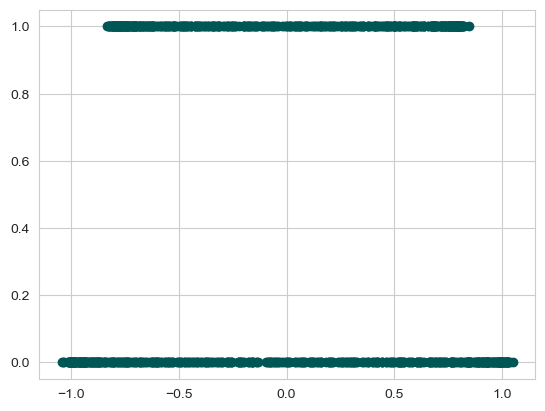

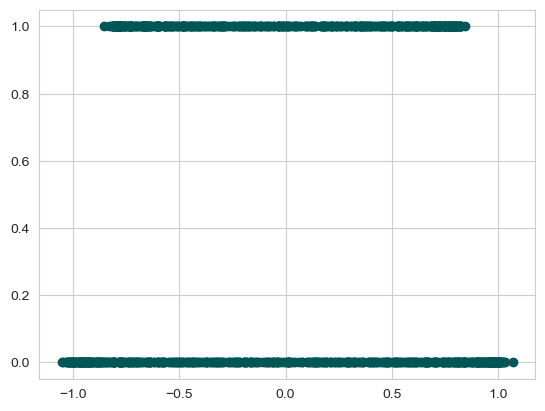

In [15]:
plt.scatter(df1['feature_1'], df1['target'])
plt.show()

plt.scatter(df1['feature_2'], df1['target'])
plt.show()

In [16]:
corr = df1.corr()

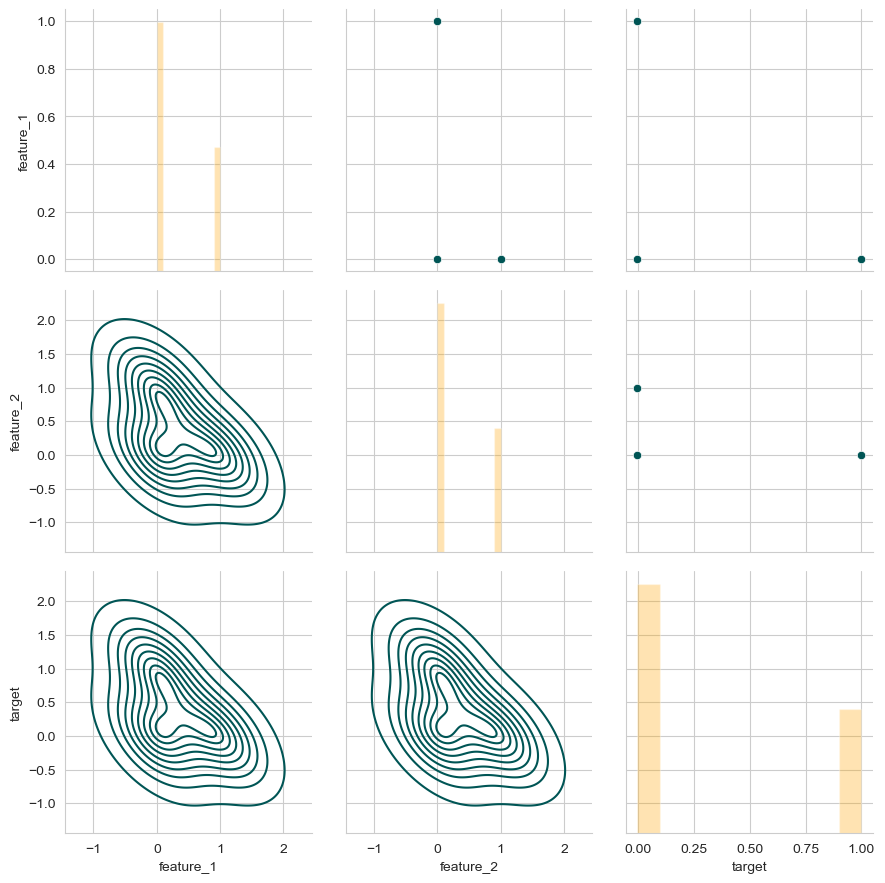

In [17]:
pairplt = sns.PairGrid(corr, height=3)
pairplt.map_upper(sns.scatterplot)
pairplt.map_diag(plt.hist, alpha=0.3, color='orange')
pairplt.map_lower(sns.kdeplot);

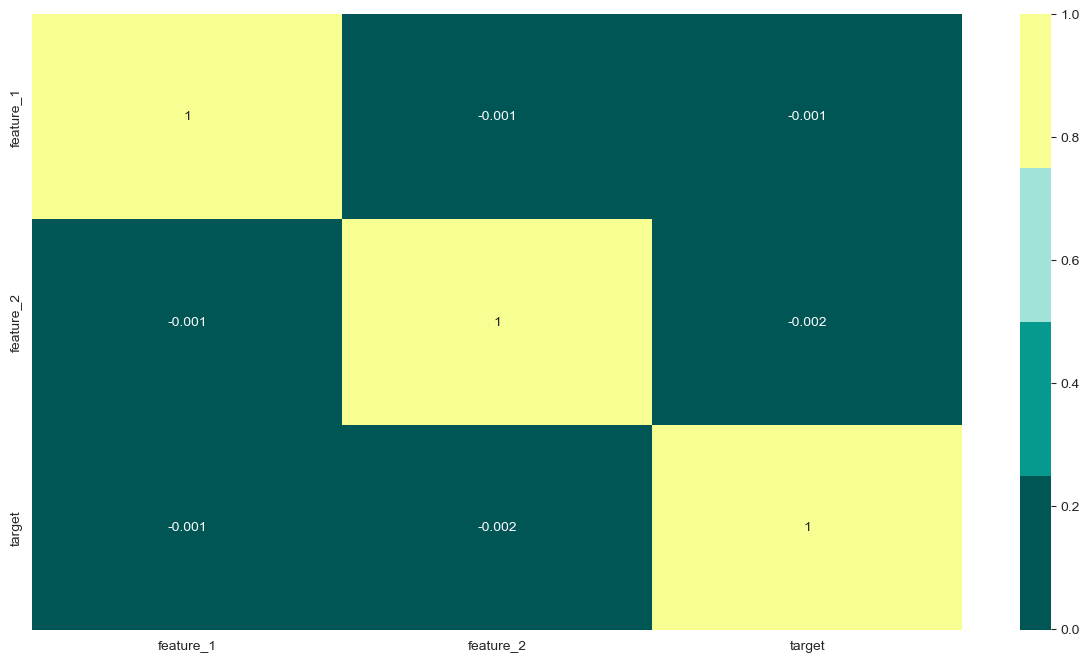

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=color);

### Корреляции и зависимостей не наблюдается.